In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **CLIENT PROFILES**

In [2]:
df = pd.read_csv('df_final_demo.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)  # Adjust the output file name as needed

df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df.columns = ['client_id', 'client_yr_tenure', 'client_mo_tenure', 'client_age', 'gender', 'num_accts', 'balance', 'calls_6m', 'logins_6m']

In [4]:
df.gender = df['gender'].apply(lambda x: 'Unknown' if x in ['U', 'X'] else 'Male' if x in ['M'] else 'Female' if x in ['F'] else x)

In [5]:
df.dropna(inplace=True)

In [6]:
df['client_age'] = df['client_age'].astype(int)
df['client_yr_tenure'] = df['client_yr_tenure'].astype(int)
df['client_mo_tenure'] = df['client_mo_tenure'].astype(int)
df['num_accts'] = df['num_accts'].astype(int)
df['calls_6m'] = df['calls_6m'].astype(int)
df['logins_6m'] = df['logins_6m'].astype(int)

In [7]:
bins = [18, 24, 39, 65, float('inf')]
labels = ['18-24', '25-39', '40-64', '65+']

# Create a new column 'age_group' with the age bins
df['age_group'] = pd.cut(df['client_age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and find the number of unique values in each group
unique_values_by_age_group = df.groupby('age_group').nunique()

# Display the result
print(unique_values_by_age_group)


#Are the primary clients younger or older, new or long-standing?
#Here we can the majority of the clients fall into the 46-64 age group, with the average age being 52 and long-standing. 

           client_id  client_yr_tenure  client_mo_tenure  client_age  gender  \
age_group                                                                      
18-24           4280                35               314           6       3   
25-39          20625                41               380          15       3   
40-64          36070                51               452          26       3   
65+             9245                51               451          32       3   

           num_accts  balance  calls_6m  logins_6m  
age_group                                           
18-24              4     4277         8          9  
25-39              7    20589         8          9  
40-64              8    36004         8          9  
65+                6     9239         8          9  


/var/folders/mg/fz6127296bzcnc_rxkv52kvm0000gn/T/ipykernel_6328/3578084135.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_values_by_age_group = df.groupby('age_group').nunique()


In [8]:
df

,client_id,client_yr_tenure,client_mo_tenure,client_age,gender,num_accts,balance,calls_6m,logins_6m,age_group
0,836976,6,73,60,Unknown,2,45105.30,6,9,40-64
1,2304905,7,94,58,Unknown,2,110860.30,6,9,40-64
2,1439522,5,64,32,Unknown,2,52467.79,6,9,25-39
3,1562045,16,198,49,Male,2,67454.65,3,6,40-64
4,5126305,12,145,33,Female,2,103671.75,0,3,25-39
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5,25-39
70605,8981690,12,148,31,Male,2,101867.07,6,6,25-39
70606,333913,16,198,61,Female,2,40745.00,3,3,40-64
70607,1573142,21,255,68,Male,3,475114.69,4,4,65+


## **EXPERIMENT ROSTER**

In [9]:
experiment = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
experiment.to_csv('output.csv', index=False)  # Adjust the output file name as needed

In [10]:
experiment.dropna(inplace=True)

experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## **DIGITAL FOOTPRINTS**

In [11]:
web1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
web1.to_csv('output_1t.csv', index=False)  # Adjust the output file name as needed

web1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [12]:
web2 = pd.read_csv('df_final_web_data_pt_2.txt', delimiter=',')  # Adjust the delimiter based on your file format

# Save the DataFrame to a CSV file
web2.to_csv('outp2ut.csv', index=False)  # Adjust the output file name as needed_

web2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [13]:
total_web = pd.concat([web1, web2])

In [14]:
total_web.dropna(inplace=True)

In [15]:
total_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [16]:
total_web.process_step.value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

In [17]:
total = pd.merge(total_web, experiment, on='client_id',how='left')

In [18]:
total['Variation']=total.groupby('client_id')['Variation'].transform('first')

In [19]:
total

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,None
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,None
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,None
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,None


In [20]:
total.dropna(inplace=True)

In [21]:
total['Variation'].value_counts(dropna=False)

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [22]:
total

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [38]:
total.process_step = total['process_step'].apply(lambda x: 'verified' if x in ['confirm'] else x)

In [39]:
tested = total[total['Variation'] == 'Test']

tested

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
637483,1574008,117364417_77840596075,528720790_71583064618_169151,verified,2017-05-06 23:51:05,Test
637484,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test
637485,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test
637486,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test


In [40]:
confirm_users_count = tested[tested['process_step'] == 'confirm'].shape[0]

# Count the total number of users
total_users_count = tested.shape[0]

# Calculate the proportion of users who reach the confirm step
confirm_proportion = confirm_users_count / total_users_count

In [41]:
control = total[total['Variation'] == 'Control']

control

,client_id,visitor_id,visit_id,process_step,date_time,Variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,verified,2017-04-05 12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control
...,...,...,...,...,...,...
637471,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [42]:
confirm_users_count_1 = control[control['process_step'] == 'confirm'].shape[0]

# Count the total number of users
total_users_count_1 = control.shape[0]

# Calculate the proportion of users who reach the confirm step
confirm_proportion_1 = confirm_users_count_1 / total_users_count_1

Client Behavior Analysis

In [27]:
#Answer the following questions about demographics:

#Who are the primary clients using this online process?

#Next, carry out a client behaviour analysis to answer any additional relevant questions you think are important.

## **Success Indicators**

Completion Rate: The proportion of users who reach the final ‘confirm’ step.

In [43]:
print("Proportion of users who reached the confirm step in the Test enviorment:", confirm_proportion)
print("Proportion of users who reached the confirm step in the Control enviorment:", confirm_proportion_1)

Proportion of users who reached the confirm step in the Test enviorment: 0.0
Proportion of users who reached the confirm step in the Control enviorment: 0.0


In [44]:
crosstab_result = pd.crosstab(total['Variation'], total['process_step'])

crosstab_result

process_step,start,step_1,step_2,step_3,verified
Variation,,,,,
Control,47608,29668,25886,22795,17505
Test,56474,38768,30989,25894,25722


In [45]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

#P-value is >= 0.05, this indicates that there is not enough evidence to conclude a significant association between the variables. 

(508.4364763023511, 1.0030756272740076e-108)

Text(0.5, 1.0, 'Rate by Steps')

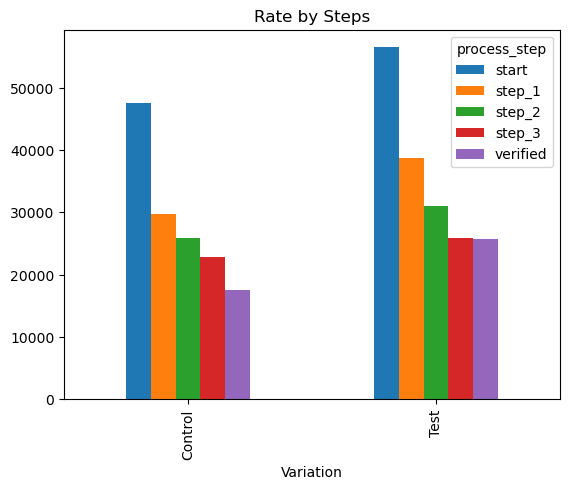

In [46]:
crosstab_result.plot(kind="bar", stacked=False)
plt.title("Rate by Steps")

Time Spent on Each Step: The average duration users spend on each step.

Error Rates: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

Bounce Rate - The percentage of users who navigate away from the website after viewing only one page. A high bounce rate may indicate that the UI is not engaging or intuitive enough to hold users' attention.

In [37]:
# Identify visitors who visited the "start" step but did not visit any subsequent steps
bounce_visitors = total[total['process_step'] == 'start']['visitor_id'].unique()
for step in total['process_step'].unique():
    if step != 'start':
        bounce_visitors = np.setdiff1d(bounce_visitors, total[total['process_step'] == step]['visitor_id'].unique())
# Calculate the bounce rate
bounce_rate = (len(bounce_visitors) / total_unique_visitors) * 100
# Print the bounce rate
print("Bounce Rate: {:.2f}%".format(bounce_rate))

Bounce Rate: 14.20%


Step Completion Rates - Step Completion Rates: Calculate the completion rates for each step of the process separately. This will help identify any specific steps where users are experiencing difficulties or drop-offs, allowing you to pinpoint areas for improvement.

In [35]:
# Convert date_time column to datetime format
total['date_time'] = pd.to_datetime(total['date_time'])

In [36]:
# Calculate the total number of unique visitors who started the process
total_unique_visitors = total['visitor_id'].nunique()
# Group by process step and calculate the completion rate for each step
step_completion_rate = total.groupby('process_step').apply(lambda x: (x['visitor_id'].nunique() / total_unique_visitors) * 100)
# Print the completion rate for each step
print("Step Completion Rate:")
print(step_completion_rate)

Step Completion Rate:
process_step
confirm    62.348467
start      97.239828
step_1     83.239007
step_2     74.963846
step_3     69.306029
dtype: float64
